In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

 

Data Collection and Processing


In [8]:
car_dataset = pd.read_csv("C:\\Users\\tharu\\Desktop\\ml-projects\\Car-price-Prediction\\Car_Price_Prediction.csv")

In [9]:
# frist 5 rows
car_dataset.head()

,Make,Model,Year,Engine Size,Mileage,Fuel Type,Transmission,Price
0,Honda,Model B,2015,3.9,74176,Petrol,Manual,30246.207931
1,Ford,Model C,2014,1.7,94799,Electric,Automatic,22785.747684
2,BMW,Model B,2006,4.1,98385,Electric,Manual,25760.290347
3,Honda,Model B,2015,2.6,88919,Electric,Automatic,25638.003491
4,Honda,Model C,2004,3.4,138482,Petrol,Automatic,21021.386657


In [10]:
# checking the number of rows and columns
car_dataset.shape

(1000, 8)

In [11]:
# get the information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Make          1000 non-null   object 
 1   Model         1000 non-null   object 
 2   Year          1000 non-null   int64  
 3   Engine Size   1000 non-null   float64
 4   Mileage       1000 non-null   int64  
 5   Fuel Type     1000 non-null   object 
 6   Transmission  1000 non-null   object 
 7   Price         1000 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 62.6+ KB


In [12]:
#checking the missing values
car_dataset.isnull().sum()

Make            0
Model           0
Year            0
Engine Size     0
Mileage         0
Fuel Type       0
Transmission    0
Price           0
dtype: int64

In [13]:
# checking the distribution of categorical data
print(car_dataset["Fuel Type"].value_counts())
print(car_dataset["Model"].value_counts())
print(car_dataset['Transmission'].value_counts())
print(car_dataset['Make'].value_counts())



Fuel Type
Diesel      344
Petrol      331
Electric    325
Name: count, dtype: int64
Model
Model B    212
Model C    205
Model A    202
Model D    197
Model E    184
Name: count, dtype: int64
Transmission
Manual       511
Automatic    489
Name: count, dtype: int64
Make
Ford      225
Audi      212
Honda     198
Toyota    187
BMW       178
Name: count, dtype: int64


In [14]:
# Encoding the 'Fuel Type' column
car_dataset.replace({'Fuel Type': {'Petrol': 0, 'Diesel': 1, 'LPG': 2, 'Electric': 3}}, inplace=True)

# Encoding the 'transmission' column
car_dataset.replace({'Transmission': {'Manual': 0, 'Automatic': 1}}, inplace=True)

# Encoding the 'Model' column
car_dataset.replace({'Model': {'Model A': 0, 'Model B': 1, 'Model C': 2, 'Model D': 3, 'Model E': 4}}, inplace=True)

# Encoding the 'Make' column
car_dataset.replace({'Make': {'Ford': 0, 'Audi': 1, 'Honda': 2, 'Toyota': 3, 'BMW': 4}}, inplace=True)


In [15]:
car_dataset.head()

,Make,Model,Year,Engine Size,Mileage,Fuel Type,Transmission,Price
0,2,1,2015,3.9,74176,0,0,30246.207931
1,0,2,2014,1.7,94799,3,1,22785.747684
2,4,1,2006,4.1,98385,3,0,25760.290347
3,2,1,2015,2.6,88919,3,1,25638.003491
4,2,2,2004,3.4,138482,0,1,21021.386657


Spliting the data and traget

In [16]:
X= car_dataset.drop(columns=[ 'Price'], axis=1)
y= car_dataset['Price']

In [17]:
print(X)


     Make  Model  Year  Engine Size  Mileage  Fuel Type  Transmission
0       2      1  2015          3.9    74176          0             0
1       0      2  2014          1.7    94799          3             1
2       4      1  2006          4.1    98385          3             0
3       2      1  2015          2.6    88919          3             1
4       2      2  2004          3.4   138482          0             1
..    ...    ...   ...          ...      ...        ...           ...
995     3      3  2002          1.9     5445          0             0
996     2      1  2020          3.1   149112          1             0
997     0      2  2008          1.9   195387          0             1
998     3      0  2003          4.4      246          0             1
999     1      2  2020          2.1    31153          1             1

[1000 rows x 7 columns]


In [18]:
print(y)

0      30246.207931
1      22785.747684
2      25760.290347
3      25638.003491
4      21021.386657
           ...     
995    22765.597091
996    30392.575567
997    16446.892292
998    27396.156708
999    31620.864907
Name: Price, Length: 1000, dtype: float64


Splitting Training and test data

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(800, 7) (200, 7)
(800,) (200,)


In [20]:
x_train.head()

,Make,Model,Year,Engine Size,Mileage,Fuel Type,Transmission
175,2,0,2010,2.2,30916,0,0
818,0,4,2005,3.1,23382,3,0
677,2,4,2019,1.4,163819,1,1
952,1,2,2019,2.1,70910,1,1
200,1,1,2005,3.4,84579,0,0


In [21]:
x_test.head()

,Make,Model,Year,Engine Size,Mileage,Fuel Type,Transmission
37,1,2,2000,4.1,171711,1,1
726,0,3,2003,4.2,144013,3,1
846,2,4,2019,3.9,32470,3,0
295,0,2,2020,4.5,50886,0,0
924,3,2,2020,3.1,58150,1,1


In [22]:
y_train.head()

175    25288.685982
818    25984.857565
677    21059.150938
952    28536.443448
200    25173.403405
Name: Price, dtype: float64

In [23]:
y_test.head()

37     16604.498170
726    24531.174724
846    32431.531353
295    40538.382064
924    30434.529368
Name: Price, dtype: float64

Model Training

1)Linear regression

In [ ]:
# loadind the linear regression model
lin_reg_model = LinearRegression()
# training the linear regression model
lin_reg_model.fit(x_train, y_train)

LinearRegression()

Model EvalUation

In [25]:
1 # prediction on training data
training_data_prediction = lin_reg_model.predict(x_train)


In [26]:
# r squared error
error_score= metrics.r2_score(y_train, training_data_prediction)
print("R squared error: ", error_score)

R squared error:  0.8405818531335401


Visualiza thee actual prices and predicted Prices

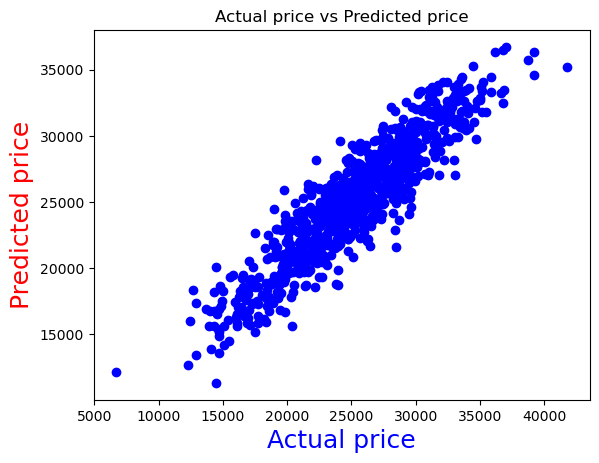

In [33]:
plt.scatter(y_train, training_data_prediction, color="blue", label="Training data")
plt.xlabel("Actual price", fontsize=18,color="blue")
plt.ylabel("Predicted price", fontsize=18,color="red")
plt.title("Actual price vs Predicted price")
plt.show()

In [43]:
# prediction on test data
test_data_prediction = lin_reg_model.predict(x_test)


In [44]:
# r squared error
training_data_r2_score = metrics.r2_score(y_train, training_data_prediction)
test_data_r2_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared error: ", training_data_r2_score)
print("R squared error: ", test_data_r2_score)


R squared error:  0.8405818531335401
R squared error:  0.8343849568053808


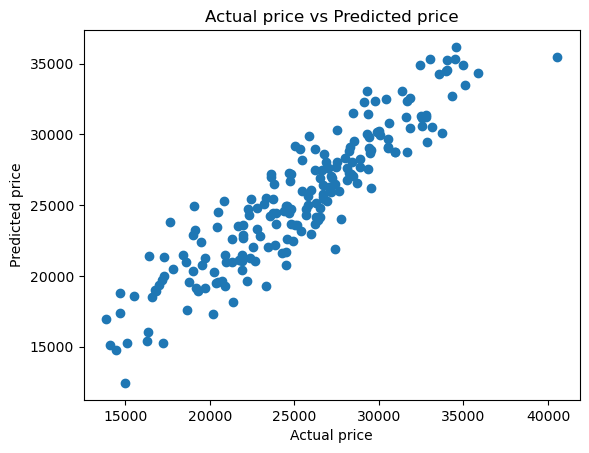

In [45]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual price vs Predicted price")
plt.show()